In [177]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d.art3d import Line3DCollection
%matplotlib inline

In [196]:
# let's start with the important stuff. pick your colors.
cols = ['#003acc', '#e60029']
number_of_node=10
# Imagine you have three node-aligned snapshots of a network
G1 = nx.random_geometric_graph(number_of_node, 1, seed=896803)
G2 = nx.random_geometric_graph(number_of_node, 1, seed=896803)
#G3 = nx.karate_club_graph()

pos = nx.circular_layout(nx.random_geometric_graph(number_of_node, 1, seed=896803)) # assuming common node location
graphs = [G1,G2]#, G3]


C:\Users\Ali\AppData\Local\Temp\ipykernel_4744\591971389.py:65: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 9.0


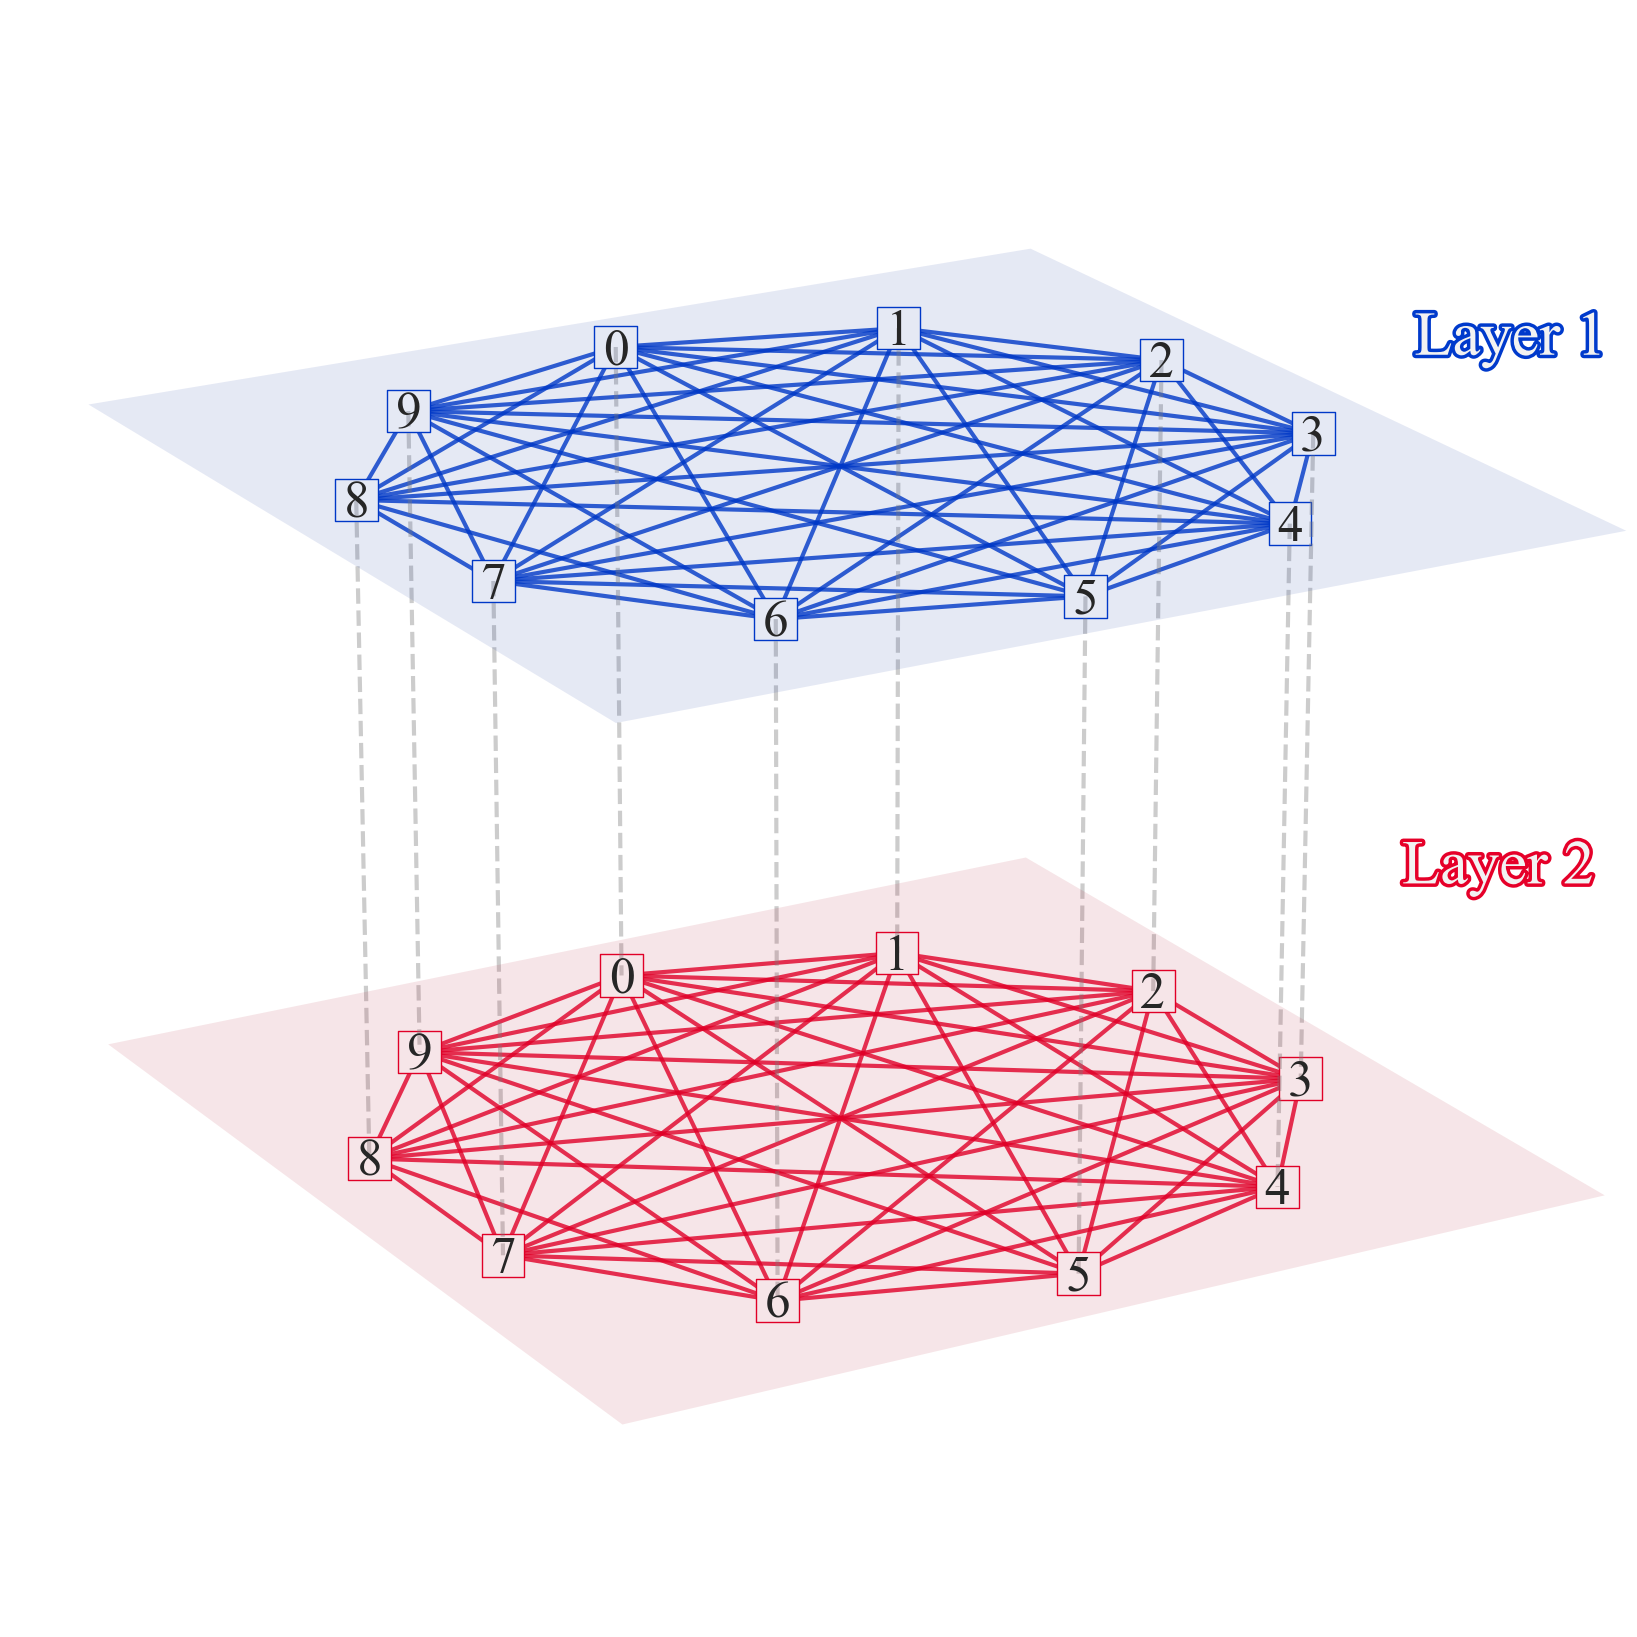

In [245]:
w = 21
h = 21

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=100, subplot_kw={'projection':'3d'})

for gi, G in enumerate(graphs):
    # node positions
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = [cols[gi]]*len(xs)
    
    # if you want to have between-layer connections
    if gi > 0:
        thru_nodes = np.arange(number_of_node)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.4, linestyle='--', linewidth=3)
        ax.add_collection3d(between_lines)

    # add within-layer edges 
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi-1, color=cols[gi], alpha=0.8, linewidth=3)
    ax.add_collection3d(line_collection)
    
    # now add nodes
    ax.scatter(xs, ys, zs, c='w', s=940, edgecolors=cs, marker='s', alpha=1, zorder=gi+1)
    
    # if you want labels...
    for li, lab in enumerate(list(G.nodes())):
        ax.text(xs[li], ys[li], zs[li]+0.007, lab, color='#262626', zorder=gi+200, fontsize=37,font='Times New Roman',
                ha='center', va='center')
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label layer
    layertext = ax.text(2.2, 2.8, gi*0.95+0.5, "Layer %i"%(gi+1),
                        color='.95', fontsize=45, zorder=1e5, ha='left', va='center',font='Times New Roman',
                        path_effects=[path_effects.Stroke(linewidth=5, foreground=cols[gi]),
                                      path_effects.Normal()])
    

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 30
height_angle = 200
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 9.0

ax.set_axis_off()
plt.savefig('multilayer_network_wlabels.png',dpi=100)
plt.show()

In [212]:
line_collection

In [60]:
np.arange(34)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [93]:
cols[gi]

1

In [142]:
for gi, G in enumerate(graphs):
    print(gi)

0
1
